# TFM - Predicción potenciales compradores de un ecommerce

Este trabajo, está principalmente enfocado a la creación de un modelo de predicción de potenciales compradores en un ecommerce real relacionado con el mundo empresarial.

Se trata de realizar una clasificación de visitantes a una web de venta online en función de los datos que se han almacenado de ellos y establecer su nivel potencial de compra.

Para ello se dispone de diferentes repositorios con datos históricos relativos a:
* características básicas del registro/lead: fecha registro, procedencia, marca de comprador, cuando compró.
* características identificativas anonimizadas de los mismos: email, ubicación geográfica, tipo de persona.
* log de sus movimientos/navegación en la web.
* información sobre los productos que ha comprado.

**Información relevante del negocio**

Los datos proceden de un ecommerce con sede en Colombia que se dedica a la venta de productos relacionados con la información de empresas del país: Informes Comerciales y módulos de información detallada sobre Datos Financieros, Prensa, Administradores, Incidencias, etc, Informes Sectoriales, Base de datos a medida, Productos de Marketing (mercadeo), Información de accionistas, Información de proveedores y clientes, etc.

Los usuarios potenciales compradores (personas en su nombre o representando a una empresa u otra entidad), llegan a la web del ecommerce por diferentes canales: directorios propios, webs de terceros, desde buscadores por labores de SEO y de SEM, etc.  

Dichos usuarios tienen acceso a diferentes productos de menor contenido a cambio de registrarse en un formulario del site, en el que cumplimentan datos personales, email, teléfono, profesión, etc. El usuario pasa a ser Registrado, y es lo que en el mundo del ecommerce se denomina “lead”.  

Tras el registro se permite el acceso a información muy básica sobre las empresas buscadas (Ficha de empresa), y se otorga la posibilidad de consumir gratis 5 productos de información a los que llamamos perfiles de empresa.  

La oferta caduca a los 30 días.  

El Perfil de empresa es un producto con contenido básico y su objetivo es mostrar a los potenciales compradores el nivel del contenido de los productos que suministra el ecommerce.  

Resumiendo, la dinámica es la siguiente:
* Un usuario busca una empresa en internet o en la web.
* Al seleccionar una de las listadas en la búsqueda, se presenta una Ficha (Identificación) y se crea un registro en el log. Se muestra los productos disponibles para consumir.  
    * Productos Promocionales (Perfil de Empresa). Para usuarios Registrados, si el Usuario se registra.
    * Resto de Productos son de Pago. Es necesario estar registrado y pagar.
* El usuario consume un producto (registro en el log) o vuelve a buscar otra empresa.  

Si el usuario Registrado está interesado en conocer más a fondo una empresa o un determinado producto de pago, se le ofrece la posibilidad de contratación:  
* PPV: Compra puntual del producto
* Bonos: compra de un conjunto de unidades o una cantidad de productos a cambio de un pago anticipado.
* Suscripción: pagando una cantidad periodica permite el acceso y consumo de productos, limitado por el volumen de compra y por la fecha de caducidad de la suscripción

Cuando se produce una de estas contrataciones el usuario “Registrado”, pasa a ser “Cliente”.

El propietario del ecommerce tiene información del usuario de su plataforma de Google Analytics que utiliza para la captación en internet, uso de cookies, estrategias de SEO y SEM, acuerdos con portales.  

Ahora desea dar un paso más y quiere conocer más sobre los usuarios registrados para determinar la probabilidad de conversión a cliente. Saber cuáles son potenciales compradores a partir de los datos de ese registro en sus sistemas, del hábito de consumo de productos, y del tipo de empresa buscada/consultada.  

El conjunto de datos está muy desbalanceado por ello es muy importante determinar a qué usuarios registrados debe dirigir el ecommerce sus campañas de captación.  

Por otra parte, pero relacionado con el mismo tema, desean saber que perfil tienen sus clientes y que variables son las mas influyentes/relevantes en la predicción de compra para modificar la estrategia de marketing y su posicionamiento en Internet.  


---------------------

## Análisis y limpieza

En el siguiente notebook se realizará un análisis exploratorio de la información, tanto el fichero de usuarios como el de consumos.

### Modelo de Datos - CONSUMOS

* **IDCONSUMO**: Identificador Único del Consumo (Ej: 40057306)
* **ID_USUARIO**: Id Único de Usuario (Ej: 8107310)
* **IDPRODUCTO**: Identificador de Producto, del producto consumido (Ej: 144920)
* **DESCPRODUCTO**: Descripción del Producto consumido (Ej: Perfil Promocional)
* **IDGRUPOPROD**: Identificador del Grupo de Productos al que pertenece el Producto consumido (Ej: 144920)
* **DESCGRUPOPROD**: Descripción del Grupo de Productos al que pertenece el Producto consumido (Ej: Perfil Promocional)
* **FECHACONSUMO**: Fecha del Consumo (Ej: 01/01/2018)
* **EMPCONSUL_ID**: Id Único de la empresa asociada al producto consumido (Ej: 986515)
* **EMPCONSUL_CIIU**: Código de Actividad CIIU de la empresa asociada al producto consumido (Ej: H4921)
* **EMPCONSUL_PROV**: Departamento de la empresa asociada al producto consumido (Ej: ATLANTICO)
* **EMPCONSUL_EST**: Estado de la empresa asociada al producto consumido (Ej: ACTIVA)

### Librerías

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 200)
# pd.options.display.max_columns

------------------

------------------

### Dataset - Usuarios

Leemos la información

In [2]:
df_cons = pd.read_csv('Data/Consumos.txt', sep = ';', encoding = 'ISO-8859-1')

In [3]:
df_cons.head()

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,"40057306,00","6868835,00","144920,00",Perfil Promocional,144920,Perfil Promocional,1/1/2018 0:00:00,986515,H4921,ATLANTICO,ACTIVA
1,"40057715,00","6868838,00","144920,00",Perfil Promocional,144920,Perfil Promocional,1/1/2018 0:00:00,102614,N8121,BOGOTA,ACTIVA
2,"40057785,00","6868841,00","144917,00",Ficha Básica,144917,Ficha Básica Promocional,1/1/2018 0:00:00,1520173,K6412,BOGOTA,CANCELACIËN
3,"40057786,00","6868841,00","144920,00",Perfil Promocional,144920,Perfil Promocional,1/1/2018 0:00:00,1520173,K6412,BOGOTA,CANCELACIËN
4,"40057779,00","6868841,00","144920,00",Perfil Promocional,144920,Perfil Promocional,1/1/2018 0:00:00,2971771,P8544,BOGOTA,ACTIVA


Realizamos un informe conpandas profiling para obtener un análisis previo aproximado.

In [4]:
profile = ProfileReport(df_cons)
profile.to_file('report_consumo.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

------------------

------------------

### Tipo de variables

Las primeras transformaciones que se realizarán, serán sobre los formatos de las variables. Se asignará el formato correcto a cada variable en función de la descripción que se tiene de cada variabable.

In [5]:
df_cons.dtypes

IDCONSUMO         object
IDUSUARIO         object
IDPRODUCTO        object
DESCPRODUCTO      object
IDGRUPOPROD        int64
DESCGRUPOPROD     object
FECHACONSUMO      object
EMPCONSUL_ID       int64
EMPCONSUL_CIIU    object
EMPCONSUL_PROV    object
EMPCONSUL_EST     object
dtype: object

**Lo primero es cambiar las comas, de las columnas numericas, por puntos. Después se convierten a entero**

In [6]:
df_cons['IDUSUARIO'] = df_cons['IDUSUARIO'].str.replace(",",".")
df_cons['IDCONSUMO'] = df_cons['IDCONSUMO'].str.replace(",",".")
df_cons['IDPRODUCTO'] = df_cons['IDPRODUCTO'].str.replace(",",".")

**convertimos al tipo deseado cada variable**

In [7]:
df_cons['IDUSUARIO'] = df_cons['IDUSUARIO'].astype('float').astype('int')
df_cons['IDCONSUMO'] = df_cons['IDCONSUMO'].astype('float').astype('int')
df_cons['IDPRODUCTO'] = df_cons['IDPRODUCTO'].astype('float').astype('int')
df_cons['FECHACONSUMO'] = pd.to_datetime(df_cons['FECHACONSUMO'])

Comprobación

In [8]:
df_cons.dtypes

IDCONSUMO                  int32
IDUSUARIO                  int32
IDPRODUCTO                 int32
DESCPRODUCTO              object
IDGRUPOPROD                int64
DESCGRUPOPROD             object
FECHACONSUMO      datetime64[ns]
EMPCONSUL_ID               int64
EMPCONSUL_CIIU            object
EMPCONSUL_PROV            object
EMPCONSUL_EST             object
dtype: object

------------------

------------------

### Duplicidad de la información

Este dataset tiene la información a nivel cliente. Cada usuario debe ser un registro único. 

In [9]:
df_cons.duplicated().sum()

9764

In [10]:
df_cons.shape

(938580, 11)

In [11]:
df_cons[df_cons.duplicated(keep = False) == True].head(10)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
603,40072208,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
604,40072310,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
605,40072312,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
606,40072224,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
607,40072225,6870059,144920,Perfil Promocional,144920,Perfil Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
608,40072275,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
609,40072207,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,1781296,G4729,BOGOTA,CANCELACIËN
610,40072214,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,4417646,I5611,QUINDIO,ACTIVA
611,40072217,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,4417646,I5611,QUINDIO,ACTIVA
612,40072216,6870059,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,2711168,G4771,ANTIOQUIA,INACTIVA TEMPORAL


Eliminamos los duplicados

In [12]:
df_cons.drop_duplicates(inplace = True, ignore_index = True)

In [13]:
df_cons.shape

(928816, 11)

In [14]:
df_cons.duplicated().sum()

0

**Realizamos una última comprobación de duplicidad. Que el número total de registros sea el mismo que el total de IDCONSUMO unicos.**

In [15]:
len(df_cons['IDCONSUMO'].unique())

928816

In [16]:
df_cons.shape[0]

928816

------------------

------------------

### Valores *Missings*

**A continuación se realiza un análisis de los valores missing en de cada variable y su respectivo tratamiento**

In [17]:
df_cons.isna().sum()

IDCONSUMO            0
IDUSUARIO            0
IDPRODUCTO           0
DESCPRODUCTO         0
IDGRUPOPROD          0
DESCGRUPOPROD        0
FECHACONSUMO         0
EMPCONSUL_ID         0
EMPCONSUL_CIIU    3561
EMPCONSUL_PROV    3561
EMPCONSUL_EST     3561
dtype: int64

In [18]:
df_cons.head(5)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,40057306,6868835,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,986515,H4921,ATLANTICO,ACTIVA
1,40057715,6868838,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,102614,N8121,BOGOTA,ACTIVA
2,40057785,6868841,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
3,40057786,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
4,40057779,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,2971771,P8544,BOGOTA,ACTIVA


**1. EMPCONSUL_CIIU, EMPCONSUL_PROV y EMPCONSUL_EST**

Recordamos:

* **EMPCONSUL_CIIU**: Código de Actividad CIIU de la empresa asociada al producto consumido (Ej: H4921)
* **EMPCONSUL_PROV**: Departamento de la empresa asociada al producto consumido (Ej: ATLANTICO)
* **EMPCONSUL_EST**: Estado de la empresa asociada al producto consumido (Ej: ACTIVA) 

In [19]:
df_cons[['EMPCONSUL_CIIU', 'EMPCONSUL_PROV', 'EMPCONSUL_EST']].isna().sum()

EMPCONSUL_CIIU    3561
EMPCONSUL_PROV    3561
EMPCONSUL_EST     3561
dtype: int64

Vemos que los registros con valores nulos en las 3 variables son comunes a las 3 variables.

In [20]:
len(df_cons[(df_cons['EMPCONSUL_CIIU'].isna()) | (df_cons['EMPCONSUL_PROV'].isna()) | (df_cons['EMPCONSUL_EST'].isna())][['EMPCONSUL_CIIU', 'EMPCONSUL_PROV', 'EMPCONSUL_EST']])

3561

**Creamos una lista con los códigos de *EMPCONSUL_ID* que tengan a nulos los registros a tratar**

In [21]:
lista = list(df_cons[(df_cons['EMPCONSUL_CIIU'].isna()) | (df_cons['EMPCONSUL_PROV'].isna()) | (df_cons['EMPCONSUL_EST'].isna())]['EMPCONSUL_ID'].unique())

**Podemos observar que los registros de dichos códigos, tienen registros con esos campos informados, por los que habria que computarlos**

In [22]:
df_cons[df_cons['EMPCONSUL_ID'].isin(lista)].sort_values(by = ['EMPCONSUL_ID']).head(10)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
43766,40904978,6942123,144920,Perfil Promocional,144920,Perfil Promocional,2018-02-20,92025,K6412,BOGOTA,ACTIVA
304817,45449840,7342771,144920,Perfil Promocional,144920,Perfil Promocional,2018-03-09,92025,K6412,BOGOTA,ACTIVA
61539,41229649,6971928,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-05-03,92025,NaN,NaN,NaN
61538,41229648,6971928,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-05-03,92025,NaN,NaN,NaN
417882,46380432,7427065,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-10-22,92025,K6412,BOGOTA,ACTIVA
619985,49837624,7741097,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-04-23,92025,K6412,BOGOTA,ACTIVA
619984,49837816,7741097,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-04-23,92025,K6412,BOGOTA,ACTIVA
700398,51043909,7846951,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-06-17,92025,K6412,BOGOTA,ACTIVA
831703,53217525,8070896,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-07-10,92025,K6412,BOGOTA,ACTIVA
831704,53217532,8070896,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-07-10,92025,K6412,BOGOTA,ACTIVA


**Creamos un dataframe con los datos (no nulos) de los códigos de la lista creada**

In [23]:
df_cons_imp = df_cons[df_cons['EMPCONSUL_ID'].isin(lista)].sort_values(by=['EMPCONSUL_ID'])[['EMPCONSUL_ID','EMPCONSUL_CIIU', 'EMPCONSUL_PROV', 'EMPCONSUL_EST']].dropna()

In [24]:
df_cons_imp.drop_duplicates(inplace = True, ignore_index = True)

Comprobamos que se ha generado correctamente

In [25]:
len(df_cons_imp['EMPCONSUL_ID'].unique())

361

In [26]:
len(df_cons_imp)

361

In [27]:
df_cons_imp.isna().sum()

EMPCONSUL_ID      0
EMPCONSUL_CIIU    0
EMPCONSUL_PROV    0
EMPCONSUL_EST     0
dtype: int64

**Realizamos un cruce de información**

Antes de nada, renombramos las columnas para evitar el conflicto

In [28]:
df_cons_imp.rename(columns = {'EMPCONSUL_CIIU': 'EMPCONSUL_CIIU_2', 'EMPCONSUL_PROV': 'EMPCONSUL_PROV_2', 'EMPCONSUL_EST': 'EMPCONSUL_EST_2'}, inplace = True)

In [29]:
df_cons = pd.merge(left = df_cons, right = df_cons_imp, how = 'left', left_on = 'EMPCONSUL_ID', right_on = 'EMPCONSUL_ID')    

Comprobación

In [30]:
df_cons[(df_cons['EMPCONSUL_CIIU'].isna()) | (df_cons['EMPCONSUL_PROV'].isna()) | (df_cons['EMPCONSUL_EST'].isna())].head()

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST,EMPCONSUL_CIIU_2,EMPCONSUL_PROV_2,EMPCONSUL_EST_2
166,40061337,6869111,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,102800,NaN,NaN,NaN,C2930,BOGOTA,ACTIVA
456,40068908,6869786,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,631006,NaN,NaN,NaN,NaN,NaN,NaN
457,40068871,6869786,144920,Perfil Promocional,144920,Perfil Promocional,2018-02-01,631006,NaN,NaN,NaN,NaN,NaN,NaN
538,49777875,6869968,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-04-17,2971738,NaN,NaN,NaN,NaN,NaN,NaN
539,49777872,6869968,144917,Ficha Básica,144917,Ficha Básica Promocional,2019-04-17,2971738,NaN,NaN,NaN,NaN,NaN,NaN


Realizamos la transformación

In [31]:
df_cons.loc[df_cons['EMPCONSUL_CIIU'].isna(), 'EMPCONSUL_CIIU'] = df_cons['EMPCONSUL_CIIU_2']
df_cons.loc[df_cons['EMPCONSUL_PROV'].isna(), 'EMPCONSUL_PROV'] = df_cons['EMPCONSUL_PROV_2']
df_cons.loc[df_cons['EMPCONSUL_EST'].isna(), 'EMPCONSUL_EST'] = df_cons['EMPCONSUL_EST_2']

Comprobación

In [32]:
df_cons[df_cons.index == 166]

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST,EMPCONSUL_CIIU_2,EMPCONSUL_PROV_2,EMPCONSUL_EST_2
166,40061337,6869111,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,102800,C2930,BOGOTA,ACTIVA,C2930,BOGOTA,ACTIVA


In [33]:
df_cons[df_cons.index == 456]

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST,EMPCONSUL_CIIU_2,EMPCONSUL_PROV_2,EMPCONSUL_EST_2
456,40068908,6869786,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-02-01,631006,NaN,NaN,NaN,NaN,NaN,NaN


**Eliminamos los campos sobrantes**

In [34]:
df_cons.drop(['EMPCONSUL_CIIU_2','EMPCONSUL_PROV_2','EMPCONSUL_EST_2'], axis = 1, inplace = True)

In [35]:
df_cons.head(5)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,40057306,6868835,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,986515,H4921,ATLANTICO,ACTIVA
1,40057715,6868838,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,102614,N8121,BOGOTA,ACTIVA
2,40057785,6868841,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
3,40057786,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
4,40057779,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,2971771,P8544,BOGOTA,ACTIVA


Comprobamos cuantos quedan missing

In [36]:
df_cons.isna().sum()

IDCONSUMO            0
IDUSUARIO            0
IDPRODUCTO           0
DESCPRODUCTO         0
IDGRUPOPROD          0
DESCGRUPOPROD        0
FECHACONSUMO         0
EMPCONSUL_ID         0
EMPCONSUL_CIIU    2849
EMPCONSUL_PROV    2849
EMPCONSUL_EST     2849
dtype: int64

**Analizamos la información de cuantas empresas nos falta**

In [37]:
lista = list(df_cons[(df_cons['EMPCONSUL_CIIU'].isna()) | (df_cons['EMPCONSUL_PROV'].isna()) | (df_cons['EMPCONSUL_EST'].isna())]['EMPCONSUL_ID'].unique())

In [38]:
df_cons_imp = df_cons[df_cons['EMPCONSUL_ID'].isin(lista)].sort_values(by=['EMPCONSUL_ID'])[['EMPCONSUL_ID','EMPCONSUL_CIIU', 'EMPCONSUL_PROV', 'EMPCONSUL_EST']].drop_duplicates()

In [39]:
df_cons_imp.groupby('EMPCONSUL_ID')['EMPCONSUL_ID'].count().shape[0]

1275

In [40]:
df_cons_imp.shape[0]

1275

**Observamos que falta información de 1.275 empresas, al ver que son demasiadas, a pesar que son pocas consultas, imputaremos los valores como NI (No Identificado)**

In [41]:
df_cons.loc[(df_cons['EMPCONSUL_CIIU'].isna()) & (df_cons['EMPCONSUL_PROV'].isna()) & (df_cons['EMPCONSUL_EST'].isna()), ['EMPCONSUL_CIIU','EMPCONSUL_PROV','EMPCONSUL_EST']] = 'NI'

Comprobación

In [42]:
df_cons.isna().sum()

IDCONSUMO         0
IDUSUARIO         0
IDPRODUCTO        0
DESCPRODUCTO      0
IDGRUPOPROD       0
DESCGRUPOPROD     0
FECHACONSUMO      0
EMPCONSUL_ID      0
EMPCONSUL_CIIU    0
EMPCONSUL_PROV    0
EMPCONSUL_EST     0
dtype: int64

------------------

------------------

### Distribuciones y valores

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

**En este apartado se realizará una visualización sencilla de las distribuciones de cada variable e histogramas, y lo más importante se revisará la lógica y los posibles valores a aplicar en cada variable según los registros**

In [44]:
df_cons.head(5)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,40057306,6868835,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,986515,H4921,ATLANTICO,ACTIVA
1,40057715,6868838,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,102614,N8121,BOGOTA,ACTIVA
2,40057785,6868841,144917,Ficha Básica,144917,Ficha Básica Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
3,40057786,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
4,40057779,6868841,144920,Perfil Promocional,144920,Perfil Promocional,2018-01-01,2971771,P8544,BOGOTA,ACTIVA


**1. IDPRODUCTO, DESCPRODUCTO, IDGRUPOPROD y DESCGRUPOPROD**

Se comprobarán los diferentes códigos de producto y su respectivo valor delcatálogo.

In [45]:
df_catalog_prod = pd.read_excel('data/Catalogo_Producto.xlsx')

In [46]:
df_catalog_prod.head(25)

,TIPO,IDGRUPOPROD,DESCGRUPOPROD,IDPRODUCTO,DESCPRODUCTO
0,Promocion,144917,Ficha Básica Promocional,144917,Ficha Básica
1,Pago,144918,Ficha Avanzada,144918,Ficha Avanzada
2,Pago,144919,Perfil,144919,Perfil
3,Promocion,144920,Perfil Promocional,144920,Perfil Promocional
4,Pago,200000,Modulo de Información,144921,Evaluacion
5,Pago,200000,Modulo de Información,144922,Balance y Cuenta de Resultados
6,Pago,200000,Modulo de Información,144934,Balance y Cuenta de Resultados
7,Pago,200000,Modulo de Información,148765,Solvencia
8,Pago,200000,Modulo de Información,222666,Vinculaciones Empresariales
9,Pago,200001,Reportes,144923,Report 1


**DESCPRODUCTO**

In [47]:
df_cons['DESCPRODUCTO'].unique()

array(['Perfil Promocional', 'Ficha Básica', 'Perfil',
       'Balance y Cuenta de Resultados', 'Report 1', 'Evaluacion',
       'Report 3', 'Report 2', 'Solvencia', 'Ficha Avanzada', 'Report 6',
       'Report 4', 'Report 5', 'Oferta 2', 'Vinculaciones Empresariales'],
      dtype=object)

In [48]:
len(df_cons['DESCPRODUCTO'].unique())

15

**IDPRODUCTO**

In [49]:
df_cons['IDPRODUCTO'].unique()

array([144920, 144917, 144919, 144922, 144923, 144921, 144925, 144924,
       148765, 144918, 146649, 144927, 146648, 166661, 222666])

In [50]:
len(df_cons['IDPRODUCTO'].unique())

15

**DESCGRUPOPROD**

In [51]:
df_cons['DESCGRUPOPROD'].unique()

array(['Perfil Promocional', 'Ficha Básica Promocional', 'Perfil',
       'Modulo de Información', 'Reportes', 'Ficha Avanzada', 'Otros'],
      dtype=object)

In [52]:
len(df_cons['DESCGRUPOPROD'].unique())

7

**IDGRUPOPROD**

In [53]:
df_cons['IDGRUPOPROD'].unique()

array([144920, 144917, 144919, 200000, 200001, 144918, 200002],
      dtype=int64)

In [54]:
len(df_cons['IDGRUPOPROD'].unique())

7

agrupamos

In [55]:
df_cons_agg = df_cons.groupby(['IDPRODUCTO','DESCPRODUCTO','IDGRUPOPROD','DESCGRUPOPROD'], as_index = False)['IDCONSUMO'].count()

In [56]:
df_cons_agg.head(25)

,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,IDCONSUMO
0,144917,Ficha Básica,144917,Ficha Básica Promocional,440229
1,144918,Ficha Avanzada,144918,Ficha Avanzada,53474
2,144919,Perfil,144919,Perfil,3190
3,144920,Perfil Promocional,144920,Perfil Promocional,424446
4,144921,Evaluacion,200000,Modulo de Información,1498
5,144922,Balance y Cuenta de Resultados,200000,Modulo de Información,2212
6,144923,Report 1,200001,Reportes,1096
7,144924,Report 2,200001,Reportes,2139
8,144925,Report 3,200001,Reportes,262
9,144927,Report 4,200001,Reportes,132


In [57]:
lista_id_prod = list(df_cons_agg['IDPRODUCTO'])

**Comprobamos contra el catálogo que todos estén bien asignados**

In [58]:
for i in lista_id_prod:
    print('Comprobación del producto ', i, ' del dataset en el catálogo:')
    print('----------------------------------')
    print(' ')
    print('DESC_PRODUCTO')
    print('     Valor descripción en catálogo:', df_catalog_prod[df_catalog_prod['IDPRODUCTO'] == i]['DESCPRODUCTO'])
    print('     Valor descripción en el dataset:', df_cons_agg[df_cons_agg['IDPRODUCTO'] == i]['DESCPRODUCTO'])
    print(' ')
    print('----------------------------------')
    print(' ')
    print('ID_GRUPO_PRODUCTO')
    print('     Valor código en catálogo:', df_catalog_prod[df_catalog_prod['IDPRODUCTO'] == i]['IDGRUPOPROD'])
    print('     Valor código en el dataset:', df_cons_agg[df_cons_agg['IDPRODUCTO'] == i]['IDGRUPOPROD'])
    print(' ')
    print('----------------------------------')
    print(' ')
    print('DESC_GRUPO_PRODUCTO')
    print('     Valor descripción en catálogo:', df_catalog_prod[df_catalog_prod['IDPRODUCTO'] == i]['DESCGRUPOPROD'])
    print('     Valor descripción en el dataset:', df_cons_agg[df_cons_agg['IDPRODUCTO'] == i]['DESCGRUPOPROD'])
    print(' ')
    print('**********************************')
    print(' ')

Comprobación del producto  144917  del dataset en el catálogo:
----------------------------------
 
DESC_PRODUCTO
     Valor descripción en catálogo: 0    Ficha Básica
Name: DESCPRODUCTO, dtype: object
     Valor descripción en el dataset: 0    Ficha Básica
Name: DESCPRODUCTO, dtype: object
 
----------------------------------
 
ID_GRUPO_PRODUCTO
     Valor código en catálogo: 0    144917
Name: IDGRUPOPROD, dtype: int64
     Valor código en el dataset: 0    144917
Name: IDGRUPOPROD, dtype: int64
 
----------------------------------
 
DESC_GRUPO_PRODUCTO
     Valor descripción en catálogo: 0    Ficha Básica Promocional
Name: DESCGRUPOPROD, dtype: object
     Valor descripción en el dataset: 0    Ficha Básica Promocional
Name: DESCGRUPOPROD, dtype: object
 
**********************************
 
Comprobación del producto  144918  del dataset en el catálogo:
----------------------------------
 
DESC_PRODUCTO
     Valor descripción en catálogo: 1    Ficha Avanzada
Name: DESCPRODUCTO, dtype: 

**Por último cambiaremos los valores de forma que eliminemos las tildes y ponemos en mayusculas**

In [59]:
def quitar_signo(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
        
    return s

In [60]:
df_cons['DESCPRODUCTO'] = df_cons['DESCPRODUCTO'].apply(lambda x: quitar_signo(x)).str.upper()
df_cons['DESCGRUPOPROD'] = df_cons['DESCGRUPOPROD'].apply(lambda x: quitar_signo(x)).str.upper()

In [61]:
df_cons.head(5)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL PROMOCIONAL,2018-01-01,986515,H4921,ATLANTICO,ACTIVA
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL PROMOCIONAL,2018-01-01,102614,N8121,BOGOTA,ACTIVA
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
3,40057786,6868841,144920,PERFIL PROMOCIONAL,144920,PERFIL PROMOCIONAL,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN
4,40057779,6868841,144920,PERFIL PROMOCIONAL,144920,PERFIL PROMOCIONAL,2018-01-01,2971771,P8544,BOGOTA,ACTIVA


**Distribución**

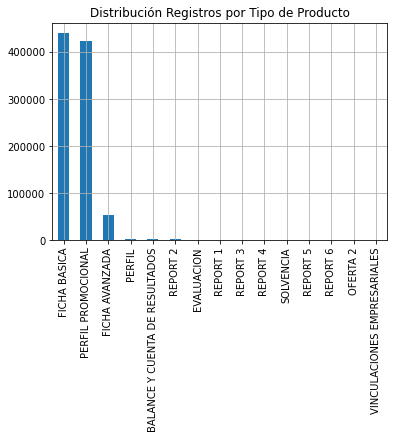

In [62]:
df_cons['DESCPRODUCTO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Producto')    
plt.grid()
plt.show()

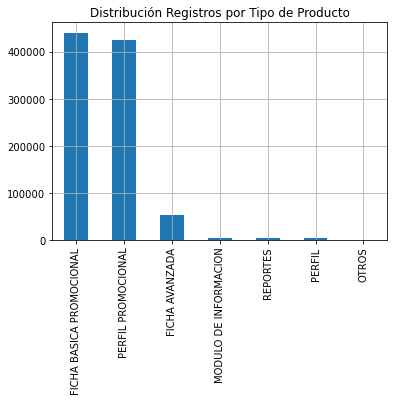

In [63]:
df_cons['DESCGRUPOPROD'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Producto')    
plt.grid()
plt.show()

**Aprovechando la información del catálogo añadimos el tipo de producto, cruzando por id producto**

In [64]:
df_catalog_prod.head()

,TIPO,IDGRUPOPROD,DESCGRUPOPROD,IDPRODUCTO,DESCPRODUCTO
0,Promocion,144917,Ficha Básica Promocional,144917,Ficha Básica
1,Pago,144918,Ficha Avanzada,144918,Ficha Avanzada
2,Pago,144919,Perfil,144919,Perfil
3,Promocion,144920,Perfil Promocional,144920,Perfil Promocional
4,Pago,200000,Modulo de Información,144921,Evaluacion


In [65]:
df_catalog_prod_tipo = df_catalog_prod[['IDGRUPOPROD','TIPO']]

In [66]:
df_cons = pd.merge(left = df_cons, right = df_catalog_prod_tipo, how = 'left', left_on = 'IDGRUPOPROD', right_on = 'IDGRUPOPROD')  

In [67]:
df_cons.isna().sum()

IDCONSUMO         0
IDUSUARIO         0
IDPRODUCTO        0
DESCPRODUCTO      0
IDGRUPOPROD       0
DESCGRUPOPROD     0
FECHACONSUMO      0
EMPCONSUL_ID      0
EMPCONSUL_CIIU    0
EMPCONSUL_PROV    0
EMPCONSUL_EST     0
TIPO              0
dtype: int64

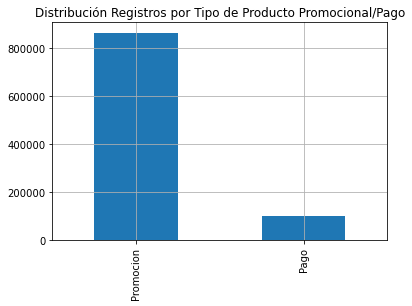

In [68]:
df_cons['TIPO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Producto Promocional/Pago')    
plt.grid()
plt.show()

Con esta infrmación podemos agregar los grupos de productos *Perfil promocional* y *Perfil* 

In [69]:
df_cons.loc[(df_cons['DESCGRUPOPROD'] == 'PERFIL PROMOCIONAL'), 'DESCGRUPOPROD'] = 'PERFIL'

Observamos la distribución

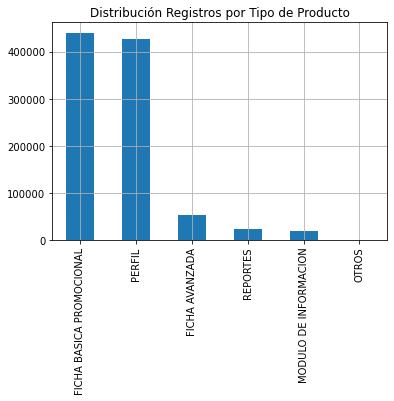

In [70]:
df_cons['DESCGRUPOPROD'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Producto')    
plt.grid()
plt.show()

-------------------------------------------------

**2. EMPCONSUL_CIIU**

A continuación analizaremos si se puede o no obtener información de esta variable, que nos aporte variabilidad a nuestro modelo.

Para ello se utilizará un catálogo extraído de la página del DANE.

In [71]:
df_catalog = pd.read_excel('Data/Estructura_detallada_organizacion_economica.xlsx')

In [72]:
df_catalog.head(3)

,SECCION,SECCION_DESC,DIVISION,DIVISION_DESC,GRUPO,GRUPO_DESC,CLASE,CLASE_DESC
0,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,111,"Cultivo de cereales (excepto arroz), legumbres..."
1,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,112,Cultivo de arroz
2,A,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P...",1,"Agricultura, ganadería, caza y actividades de ...",11,Cultivos agrícolas transitorios,113,"Cultivo de hortalizas, raíces y tubérculos"


In [73]:
df_catalog['CLASE'] = df_catalog['CLASE'].astype('str').apply(lambda x: x.zfill(4))

**Únicamente nos interesa conocer la sección, division y grupo de actividad económica. Ya que la clase aporta demasiada información, que podría llegara generar ruido**

In [74]:
df_catalog = df_catalog[['CLASE','SECCION_DESC']]

In [75]:
df_catalog.head(3)

,CLASE,SECCION_DESC
0,0111,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
1,0112,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."
2,0113,"AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y P..."


**Generamos la variable por la que cruzar, a partir de EMPCONSUL_CIIU**

In [76]:
df_cons['EMPCONSUL_CIIU_CLASE'] = df_cons['EMPCONSUL_CIIU'].str[-4:]

**Agregamos la información del catálogo**

In [77]:
df_cons = pd.merge(left = df_cons, right = df_catalog, how = "left", left_on = "EMPCONSUL_CIIU_CLASE", right_on = "CLASE")

**Comprobamos que todos los que han cruzado correctamente, y que los que no han cruzado, sea porque no aplican**

In [78]:
df_cons.head(3)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST,TIPO,EMPCONSUL_CIIU_CLASE,CLASE,SECCION_DESC
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,986515,H4921,ATLANTICO,ACTIVA,Promocion,4921,4921,TRANSPORTE Y ALMACENAMIENTO
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,102614,N8121,BOGOTA,ACTIVA,Promocion,8121,8121,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,1520173,K6412,BOGOTA,CANCELACIËN,Promocion,6412,6412,ACTIVIDADES FINANCIERAS Y DE SEGUROS


In [79]:
df_cons.isna().sum()

IDCONSUMO                   0
IDUSUARIO                   0
IDPRODUCTO                  0
DESCPRODUCTO                0
IDGRUPOPROD                 0
DESCGRUPOPROD               0
FECHACONSUMO                0
EMPCONSUL_ID                0
EMPCONSUL_CIIU              0
EMPCONSUL_PROV              0
EMPCONSUL_EST               0
TIPO                        0
EMPCONSUL_CIIU_CLASE        0
CLASE                   42521
SECCION_DESC            42521
dtype: int64

**Los restantes se considerarán como sin identificar (SD)**

In [80]:
df_cons.drop(['CLASE','EMPCONSUL_CIIU_CLASE'], axis = 1, inplace = True)

In [81]:
df_cons.loc[(df_cons['SECCION_DESC'].isna()), 'SECCION_DESC'] = 'SD'

Comprobacion

In [82]:
df_cons.isna().sum()

IDCONSUMO         0
IDUSUARIO         0
IDPRODUCTO        0
DESCPRODUCTO      0
IDGRUPOPROD       0
DESCGRUPOPROD     0
FECHACONSUMO      0
EMPCONSUL_ID      0
EMPCONSUL_CIIU    0
EMPCONSUL_PROV    0
EMPCONSUL_EST     0
TIPO              0
SECCION_DESC      0
dtype: int64

**Simplificaremos los valores del campo añadido reduciendo las descripciones, segun los sectores económicos a los que pertenecen**:
* **Sector primario**: el que obtiene productos directamente de la naturaleza, materias primas, creaciones, etc.
* **Sector secundario**: el que transforma materias primas en productos terminados o semielaborados.
* **Sector terciario**: es considerado como sector de servicios ya que no produce bienes, sino servicios.
* **Sector cuaternario**: produce servicios relacionados con la información y el conocimiento tales como investigación, desarrollo, e innovación.
* **Sector quinario**: actividades que no suelen medirse en términos monetarios, pero son una contribución fundamental a la economía.  Incluye los servicios sanitarios, la seguridad, los servicios de emergencia (bomberos, paramédicos), la educación, la cultura, la investigación y otros servicios sociales; si bien muchas de estas actividades se incluyen usualmente en el sector terciario y cuaternario. El sector quinario también incluye actividades domésticas 

In [83]:
df_cons['EMPCONSUL_SECTOR_ECONOMICO'] = None

In [84]:
# PRIMARIO
df_cons.loc[(df_cons['SECCION_DESC'].isin(['AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA',
                                           'EXPLOTACIÓN DE MINAS Y CANTERAS'])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'PRIMARIO'
# SECUNDARIO
df_cons.loc[(df_cons['SECCION_DESC'].isin(['INDUSTRIAS MANUFACTURERAS',
                                           'CONSTRUCCIÓN',
                                           'SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO',
                                           'DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRATAMIENTO DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL'
                                           ''])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'SECUNDARIO'
# TERCIARIO
df_cons.loc[(df_cons['SECCION_DESC'].isin(['TRANSPORTE Y ALMACENAMIENTO',
                                           'ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO',
                                           'ACTIVIDADES FINANCIERAS Y DE SEGUROS',
                                           'OTRAS ACTIVIDADES DE SERVICIOS',
                                           'COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS',
                                           'INFORMACIÓN Y COMUNICACIONES',
                                           'ALOJAMIENTO Y SERVICIOS DE COMIDA',
                                           'ACTIVIDADES INMOBILIARIAS',
                                           'ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTRATERRITORIALES',
                                           'ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN'])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'TERCIARIO'
# CUATERNARIO
df_cons.loc[(df_cons['SECCION_DESC'].isin(['ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS'])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'CUATERNARIO'
# QUINARIO
df_cons.loc[(df_cons['SECCION_DESC'].isin(['EDUCACIÓN',
                                           'ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL',
                                           'ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA',
                                           'ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CALIDAD DE EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES INDIVIDUALES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO'])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'QUINARIO'
# SIN DEFINIR
df_cons.loc[(df_cons['SECCION_DESC'].isin(['SD'])), 'EMPCONSUL_SECTOR_ECONOMICO'] = 'SD'

Comprobacion

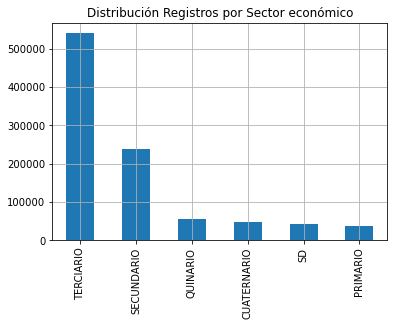

In [85]:
df_cons['EMPCONSUL_SECTOR_ECONOMICO'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Sector económico')    
plt.grid()
plt.show()

-------------------------------------------------

**3. EMPCONSUL_EST**

Analizaremos los posibles valores de la variable EMPCONSUL_EST, con el objetivo de realizar agrupaciones

In [86]:
df_cons['EMPCONSUL_EST'].unique()

array(['ACTIVA', 'CANCELACIËN', 'LIQUIDACION',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)', 'EXTINGUIDA',
       'INTERVENIDA', 'NI', 'INACTIVA TEMPORAL',
       'REESTRUCTURACION O CONCORDATO',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)',
       'ANULACIËN LIQUIDACIËN', 'ABSORBIDA', 'SALIDA CLINTON (SDNT OFAC)',
       'DISUELTA'], dtype=object)

**En primer lugar reemplazamos los caracteres raros**

In [87]:
df_cons['EMPCONSUL_EST'] = df_cons['EMPCONSUL_EST'].apply(lambda x: x.replace('Ë','O'))

Comprobacion

In [88]:
df_cons['EMPCONSUL_EST'].unique()

array(['ACTIVA', 'CANCELACION', 'LIQUIDACION',
       'LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)', 'EXTINGUIDA',
       'INTERVENIDA', 'NI', 'INACTIVA TEMPORAL',
       'REESTRUCTURACION O CONCORDATO',
       'COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)',
       'ANULACION LIQUIDACION', 'ABSORBIDA', 'SALIDA CLINTON (SDNT OFAC)',
       'DISUELTA'], dtype=object)

In [89]:
df_cons['EMPCONSUL_EST'].value_counts()

ACTIVA                                              788140
CANCELACION                                         107632
LIQUIDACION                                          39987
LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)      11096
EXTINGUIDA                                            7275
INACTIVA TEMPORAL                                     4179
NI                                                    2875
REESTRUCTURACION O CONCORDATO                          588
INTERVENIDA                                            463
COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)       110
ABSORBIDA                                               19
ANULACION LIQUIDACION                                   18
SALIDA CLINTON (SDNT OFAC)                               7
DISUELTA                                                 3
Name: EMPCONSUL_EST, dtype: int64

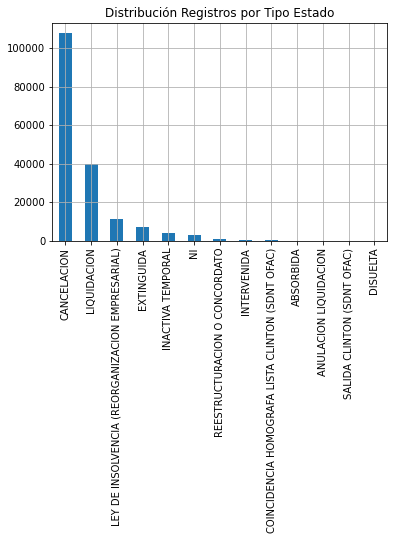

In [90]:
df_cons['EMPCONSUL_EST'].value_counts()[1:].plot(kind = 'bar')
plt.title('Distribución Registros por Tipo Estado')    
plt.grid()
plt.show()

**Realizamos las transformaciones**

Agruparemos por conceptos similares.

In [91]:
# Agrupamos: CANCELACIÓN, LIQUIDACION, EXTINGUIDA y INACTIVA TEMPORAL
df_cons.loc[(df_cons['EMPCONSUL_EST'].isin(['CANCELACION', 'LIQUIDACION', 'EXTINGUIDA', 'INACTIVA TEMPORAL','ABSORBIDA','DISUELTA'])), 'EMPCONSUL_EST'] = 'INACTIVA'

In [92]:
# Agrupamos: ANULACIÓN LIQUIDACIÓN y ACTIVA
df_cons.loc[(df_cons['EMPCONSUL_EST'].isin(['ANULACION LIQUIDACION'])), 'EMPCONSUL_EST'] = 'ACTIVA'

In [93]:
# Agrupamos: REESTRUCTURACION O CONCORDATO, INTERVENIDA y LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)
df_cons.loc[(df_cons['EMPCONSUL_EST'].isin(['REESTRUCTURACION O CONCORDATO','LEY DE INSOLVENCIA (REORGANIZACION EMPRESARIAL)','INTERVENIDA'])), 'EMPCONSUL_EST'] = 'REESTRUCTURACION'

In [94]:
# Agrupamos: COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC) y SALIDA CLINTON (SDNT OFAC)
df_cons.loc[(df_cons['EMPCONSUL_EST'].isin(['COINCIDENCIA HOMOGRAFA LISTA CLINTON (SDNT OFAC)','SALIDA CLINTON (SDNT OFAC)'])), 'EMPCONSUL_EST'] = 'RELACION_CLINTON'

**Comprobación**

In [95]:
df_cons['EMPCONSUL_EST'].unique()

array(['ACTIVA', 'INACTIVA', 'REESTRUCTURACION', 'NI', 'RELACION_CLINTON'],
      dtype=object)

In [96]:
df_cons['EMPCONSUL_EST'].value_counts()

ACTIVA              788158
INACTIVA            159095
REESTRUCTURACION     12147
NI                    2875
RELACION_CLINTON       117
Name: EMPCONSUL_EST, dtype: int64

In [97]:
df_cons['EMPCONSUL_EST'].value_counts()

ACTIVA              788158
INACTIVA            159095
REESTRUCTURACION     12147
NI                    2875
RELACION_CLINTON       117
Name: EMPCONSUL_EST, dtype: int64

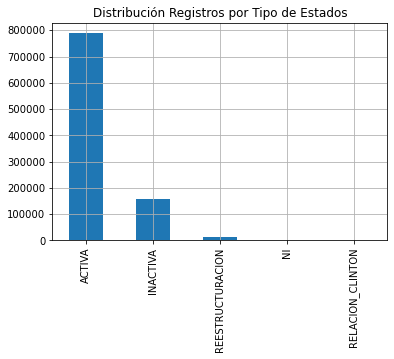

In [98]:
df_cons['EMPCONSUL_EST'].value_counts().plot(kind = 'bar')
plt.title('Distribución Registros por Tipo de Estados')    
plt.grid()
plt.show()

-------------------------------------------------

-------------------------------------------------

### Renombramos y ordenamos columnas

In [99]:
df_cons.rename(columns = {'TIPO': 'TIPO_CONSUMO',
                          'SECCION_DESC': 'EMPCONSUL_SECCION_DESC'}, inplace = True)

In [100]:
df_cons.head(3)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,EMPCONSUL_ID,EMPCONSUL_CIIU,EMPCONSUL_PROV,EMPCONSUL_EST,TIPO_CONSUMO,EMPCONSUL_SECCION_DESC,EMPCONSUL_SECTOR_ECONOMICO
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,986515,H4921,ATLANTICO,ACTIVA,Promocion,TRANSPORTE Y ALMACENAMIENTO,TERCIARIO
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,102614,N8121,BOGOTA,ACTIVA,Promocion,ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE ...,TERCIARIO
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,1520173,K6412,BOGOTA,INACTIVA,Promocion,ACTIVIDADES FINANCIERAS Y DE SEGUROS,TERCIARIO


**Ordenamos columnas**

In [101]:
df_cons.columns

Index(['IDCONSUMO', 'IDUSUARIO', 'IDPRODUCTO', 'DESCPRODUCTO', 'IDGRUPOPROD',
       'DESCGRUPOPROD', 'FECHACONSUMO', 'EMPCONSUL_ID', 'EMPCONSUL_CIIU',
       'EMPCONSUL_PROV', 'EMPCONSUL_EST', 'TIPO_CONSUMO',
       'EMPCONSUL_SECCION_DESC', 'EMPCONSUL_SECTOR_ECONOMICO'],
      dtype='object')

In [102]:
len(df_cons.columns)

14

In [103]:
df_cons = df_cons[['IDCONSUMO','IDUSUARIO','IDPRODUCTO','DESCPRODUCTO','IDGRUPOPROD','DESCGRUPOPROD','FECHACONSUMO','TIPO_CONSUMO','EMPCONSUL_ID','EMPCONSUL_EST',
                   'EMPCONSUL_SECTOR_ECONOMICO','EMPCONSUL_PROV']]

Comprobacion

In [104]:
df_cons.head(3)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,TIPO_CONSUMO,EMPCONSUL_ID,EMPCONSUL_EST,EMPCONSUL_SECTOR_ECONOMICO,EMPCONSUL_PROV
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,986515,ACTIVA,TERCIARIO,ATLANTICO
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,102614,ACTIVA,TERCIARIO,BOGOTA
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,Promocion,1520173,INACTIVA,TERCIARIO,BOGOTA


-------------------------------------------------

-------------------------------------------------

### Análisis Final

In [105]:
profile = ProfileReport(df_cons)
profile.to_file('report_cons_clean.html')

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

-------------------------------------------------

-------------------------------------------------

### Reducción de dimensionabilidad

En este apartado simplificaremos el número de filas de nuestro dataset, reduciendo el número de filas al número de clientes diferentes sin perder a información que se tiene.

Para ello lo que realizaremos es lo siguiente:

Creamos una serie de variables:

* El número de consumos por usuario
* El número de productos promocionales consumidos por usuario
* El número de productos de pago consumidos por usuario
* El numero de consumos por grupo de producto
* El numero de consumos por estado de empresa consultada
* El numero de consumos por sector economico de empresas a consultar

Además se eliminarán las columnas que no son consideradas necesarias.

**1. El número de consumos por usuario**

In [106]:
df_cons['PROD_CONSUM'] = df_cons.groupby(["IDUSUARIO"])["IDUSUARIO"].transform("count")

In [107]:
df_cons.head(3)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,TIPO_CONSUMO,EMPCONSUL_ID,EMPCONSUL_EST,EMPCONSUL_SECTOR_ECONOMICO,EMPCONSUL_PROV,PROD_CONSUM
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,986515,ACTIVA,TERCIARIO,ATLANTICO,1
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,102614,ACTIVA,TERCIARIO,BOGOTA,1
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,Promocion,1520173,INACTIVA,TERCIARIO,BOGOTA,7


**Creamos la base a partir de dataframe que tenemos en este punto.**

Para ello ordenamos los consumos por fecha

In [108]:
df_cons_base = df_cons.sort_values(by = ['IDUSUARIO','FECHACONSUMO']).groupby(['IDUSUARIO']).head(1)

In [109]:
df_cons_base.reset_index(drop=True, inplace = True)

In [110]:
df_cons_base.head(3)

,IDCONSUMO,IDUSUARIO,IDPRODUCTO,DESCPRODUCTO,IDGRUPOPROD,DESCGRUPOPROD,FECHACONSUMO,TIPO_CONSUMO,EMPCONSUL_ID,EMPCONSUL_EST,EMPCONSUL_SECTOR_ECONOMICO,EMPCONSUL_PROV,PROD_CONSUM
0,40057306,6868835,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,986515,ACTIVA,TERCIARIO,ATLANTICO,1
1,40057715,6868838,144920,PERFIL PROMOCIONAL,144920,PERFIL,2018-01-01,Promocion,102614,ACTIVA,TERCIARIO,BOGOTA,1
2,40057785,6868841,144917,FICHA BASICA,144917,FICHA BASICA PROMOCIONAL,2018-01-01,Promocion,1520173,INACTIVA,TERCIARIO,BOGOTA,7


**2. y 3. El número de productos promocionales consumidos por usuario y El número de productos de pago consumidos por usuario**

In [111]:
df_cons['unit_tmp'] = 1

In [112]:
table = pd.pivot_table(df_cons, values = 'unit_tmp', index = ['IDUSUARIO'], columns = ['TIPO_CONSUMO'], aggfunc = np.sum, fill_value = 0)

In [113]:
table.reset_index(drop = False, inplace = True)

Añadimos la información

In [114]:
df_cons_base = pd.merge(left = df_cons_base, right = table, how = "left", left_on = "IDUSUARIO", right_on = "IDUSUARIO")

**4. El numero de consumos por grupo de producto**

In [115]:
table = pd.pivot_table(df_cons, values = 'unit_tmp', index = ['IDUSUARIO'], columns = ['DESCGRUPOPROD'], aggfunc = np.sum, fill_value = 0)

In [116]:
table.reset_index(drop = False, inplace = True)

Añadimos la información

In [117]:
df_cons_base = pd.merge(left = df_cons_base, right = table, how = "left", left_on = "IDUSUARIO", right_on = "IDUSUARIO")

**5. El numero de consumos por estado de empresa consultada**

In [118]:
table = pd.pivot_table(df_cons, values = 'unit_tmp', index = ['IDUSUARIO'], columns = ['EMPCONSUL_EST'], aggfunc = np.sum, fill_value = 0)

In [119]:
table.reset_index(drop = False, inplace = True)

Añadimos la información

In [120]:
df_cons_base = pd.merge(left = df_cons_base, right = table, how = "left", left_on = "IDUSUARIO", right_on = "IDUSUARIO")

**6. El numero de consumos por sector economico de empresas a consultar**

In [121]:
table = pd.pivot_table(df_cons, values = 'unit_tmp', index = ['IDUSUARIO'], columns = ['EMPCONSUL_SECTOR_ECONOMICO'], aggfunc = np.sum, fill_value = 0)

In [122]:
table.reset_index(drop = False, inplace = True)

Añadimos la información

In [123]:
df_cons_base = pd.merge(left = df_cons_base, right = table, how = "left", left_on = "IDUSUARIO", right_on = "IDUSUARIO")

**Por último eliminamos columnas, renombramos y ordenamos al gusto**

In [124]:
df_cons_base = df_cons_base[['IDUSUARIO','DESCPRODUCTO','DESCGRUPOPROD','FECHACONSUMO','TIPO_CONSUMO','EMPCONSUL_EST','EMPCONSUL_SECTOR_ECONOMICO','EMPCONSUL_PROV',
              'PROD_CONSUM','Promocion','Pago','FICHA BASICA PROMOCIONAL','FICHA AVANZADA','PERFIL','MODULO DE INFORMACION','REPORTES','OTROS',
              'ACTIVA','INACTIVA','REESTRUCTURACION','RELACION_CLINTON','NI','PRIMARIO','SECUNDARIO','TERCIARIO','CUATERNARIO','QUINARIO','SD']]

In [125]:
df_cons_base.rename(columns = {'IDUSUARIO': 'ID_USUARIO',
                               'DESCPRODUCTO': '1A_CONS_DESCPRODUCTO',
                               'DESCGRUPOPROD': '1A_CONS_DESCGRUPOPROD',
                               'FECHACONSUMO': '1A_CONS_FECHACONSUMO',
                               'TIPO_CONSUMO': '1A_CONS_TIPO_CONSUMO',
                               'EMPCONSUL_EST': '1A_CONS_EMPCONSUL_EST',
                               'EMPCONSUL_SECTOR_ECONOMICO': '1A_CONS_EMPCONSUL_SECTOR_ECONOMICO',
                               'EMPCONSUL_PROV': '1A_CONS_EMPCONSUL_PROV',
                               'PROD_CONSUM': 'PROD_CONSUM_TOT',
                               'Promocion': 'PROMOCION_TOT',
                               'Pago': 'PAGO_TOT',
                               'FICHA BASICA PROMOCIONAL': 'FICH_BASIC_PROMO_TOT',
                               'FICHA AVANZADA': 'FICH_AVANZADA_TOT',
                               'PERFIL': 'PERFIL_TOT',
                               'MODULO DE INFORMACION': 'MODU_INFORM_TOT',
                               'REPORTES': 'REPORTES_TOT',
                               'OTROS': 'OTROS_TOT',
                               'ACTIVA': 'EST_ACTIVA_TOT',
                               'INACTIVA': 'EST_INACTIVA_TOT',
                               'REESTRUCTURACION': 'EST_REESTRUCT_TOT',
                               'RELACION_CLINTON': 'EST_CLINTON_TOT',
                               'NI': 'EST_NI_TOT',
                               'PRIMARIO': 'SECT_PRIM_TOT',
                               'SECUNDARIO': 'SECT_SECU_TOT',
                               'TERCIARIO': 'SECT_TERC_TOT',
                               'CUATERNARIO': 'SECT_CUAT_TOT',
                               'QUINARIO': 'SECT_QUIN_TOT',
                               'SD': 'SECT_SD_TOT'}, inplace = True)

Exploración de la estructura final

In [126]:
df_cons_base.shape

(367707, 28)

-------------------------------------------------

-------------------------------------------------

### Escritura de Datos

In [127]:
df_cons_base.to_csv('Data/Consumos_Clean.txt', sep = ';', encoding = 'ISO-8859-1', index = False)